In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../dataset/"))

['.ipynb_checkpoints', 'cat and dogs 1.ipynb', 'first_model_cnn.h5', 'Malaria solved_Senior.ipynb', 'second_model_augmented.h5', 'test_set', 'training_set', 'Untitled.ipynb', 'Untitled1.ipynb']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [3]:
dog_data = os.listdir('../dataset/training_set/dogs')
print(dog_data[:10]) #the output we get are the .jpg files

cat_data = os.listdir('../dataset/training_set/cats')
print('\n')
print(cat_data[:10]) #the output we get are the .jpg files

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


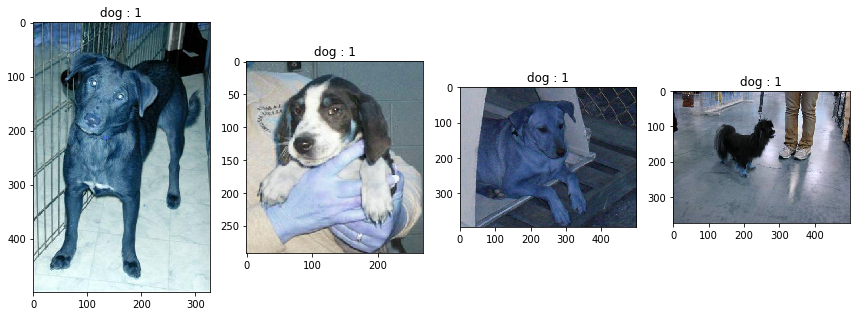

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../dataset/training_set/dogs' + "/" + dog_data[i])
    plt.imshow(img)
    plt.title('dog : 1')
    plt.tight_layout()
plt.show()

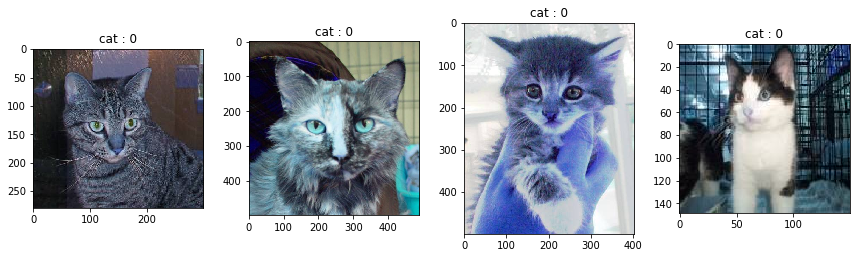

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../dataset/training_set/cats' + "/" + cat_data[i])
    plt.imshow(img)
    plt.title('cat : 0')
    plt.tight_layout()
plt.show()

In [6]:
data = []
labels = []
for img in cat_data:
    try:
        img_read = plt.imread('../dataset/training_set/cats' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None
        
for img in dog_data:
    try:
        img_read = plt.imread('../dataset/training_set/dogs' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

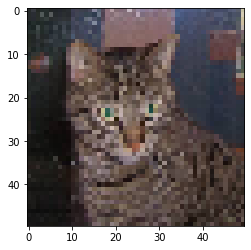

In [7]:
plt.imshow((data[0]).astype(np.uint8))
plt.show()

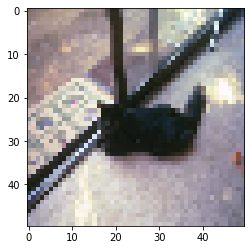

In [8]:
plt.imshow((data[400]).astype(np.uint8))
plt.show()

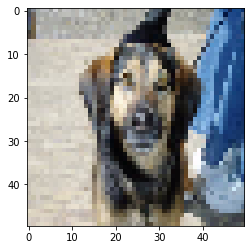

In [9]:
plt.imshow((data[6000]).astype(np.uint8))
plt.show()

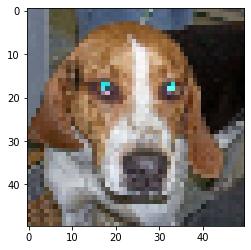

In [10]:
plt.imshow((data[7000]).astype(np.uint8))
plt.show()

In [11]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

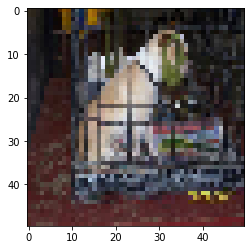

In [12]:
plt.imshow((image_data[0]).astype(np.uint8))
plt.show()

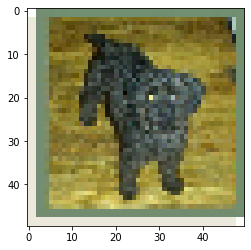

In [13]:
plt.imshow((image_data[7000]).astype(np.uint8))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)


y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [15]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (6404, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (1601, 50, 50, 3)
SHAPE OF TRAINING LABELS : (6404, 2)
SHAPE OF TESTING LABELS : (1601, 2)


In [16]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers

In [17]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [18]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [19]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [20]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Train on 6404 samples
Epoch 1/20
6404/6404 [==============================] - 18s 3ms/sample - loss: 1.0196 - accuracy: 0.5690
Epoch 2/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.7009 - accuracy: 0.6357
Epoch 3/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.6095 - accuracy: 0.6735
Epoch 4/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.5820 - accuracy: 0.6972
Epoch 5/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.5505 - accuracy: 0.7216
Epoch 6/20
6404/6404 [==============================] - 13s 2ms/sample - loss: 0.5245 - accuracy: 0.7455
Epoch 7/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.5106 - accuracy: 0.7494
Epoch 8/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.4973 - accuracy: 0.7572
Epoch 9/20
6404/6404 [==============================] - 14s 2ms/sample - loss: 0.4900 - accuracy: 0.7715s - loss: 0.4891 
Epoch 10/20
6404

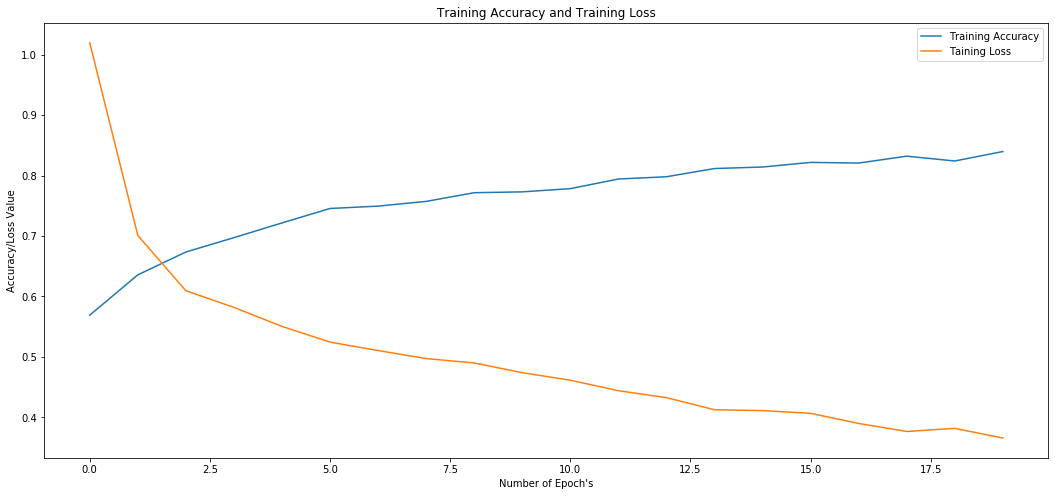

In [21]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [22]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

1601/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.45332657069731025
ACCURACY : 0.7895065546035767


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [26]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [27]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [28]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 30)

Epoch 1/30
100/100 [==============================] - 63s 630ms/step - loss: 1.0830 - accuracy: 0.5478
Epoch 2/30
100/100 [==============================] - 63s 632ms/step - loss: 0.8182 - accuracy: 0.5662
Epoch 3/30
100/100 [==============================] - 66s 658ms/step - loss: 0.7264 - accuracy: 0.5888
Epoch 4/30
100/100 [==============================] - 54s 542ms/step - loss: 0.6792 - accuracy: 0.6125
Epoch 5/30
100/100 [==============================] - 55s 549ms/step - loss: 0.6515 - accuracy: 0.6274
Epoch 6/30
100/100 [==============================] - 63s 628ms/step - loss: 0.6385 - accuracy: 0.6418
Epoch 7/30
100/100 [==============================] - 61s 613ms/step - loss: 0.6278 - accuracy: 0.6377
Epoch 8/30
100/100 [==============================] - 73s 734ms/step - loss: 0.6266 - accuracy: 0.6502
Epoch 9/30
100/100 [==============================] - 62s 619ms/step - loss: 0.6158 - accuracy: 0.6576
Epoch 10/30
100/100 [==============================] - 67s 674ms/step - l

In [29]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [30]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.4920413613319397
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.753125011920929


In [31]:
model.save('first_model_cnn.h5')
model_aug.save("second_model_augmented.h5")

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
model1 = load_model('first_model_cnn.h5')
model2 = load_model("second_model_augmented.h5")

[[0.97448236 0.02551764]]


'--------------------------------------------------------------------------------------------------------------------'

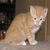

[0]
cat
[[0.97410417 0.02589587]]


'--------------------------------------------------------------------------------------------------------------------'

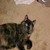

[0]
cat
[[0.9740025 0.0259975]]


'--------------------------------------------------------------------------------------------------------------------'

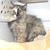

[0]
cat
[[0.9719434  0.02805658]]


'--------------------------------------------------------------------------------------------------------------------'

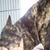

[0]
cat
[[0.97336763 0.02663234]]


'--------------------------------------------------------------------------------------------------------------------'

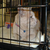

[0]
cat
[[0.97302693 0.02697311]]


'--------------------------------------------------------------------------------------------------------------------'

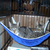

[0]
cat
[[0.97137064 0.02862944]]


'--------------------------------------------------------------------------------------------------------------------'

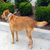

[0]
cat
[[0.9736356  0.02636433]]


'--------------------------------------------------------------------------------------------------------------------'

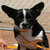

[0]
cat
[[0.972179 0.027821]]


'--------------------------------------------------------------------------------------------------------------------'

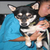

[0]
cat
[[0.97287244 0.02712756]]


'--------------------------------------------------------------------------------------------------------------------'

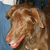

[0]
cat
[[0.97504133 0.02495865]]


'--------------------------------------------------------------------------------------------------------------------'

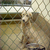

[0]
cat


In [33]:
%matplotlib inline

from tensorflow.keras.applications.mobilenet import preprocess_input


from PIL import Image, ImageFile



image_test_animal = os.listdir('../dataset/test_set/test/')
images = [ "../dataset/test_set/test/cat.4003.jpg", "../dataset/test_set/test/cat.4004.jpg",
          "../dataset/test_set/test/cat.4005.jpg", "../dataset/test_set/test/cat.4006.jpg", 
          "../dataset/test_set/test/cat.4008.jpg", "../dataset/test_set/test/cat.4015.jpg",
          "../dataset/test_set/test/dog.4011.jpg", "../dataset/test_set/test/dog.4031.jpg",
          "../dataset/test_set/test/dog.4093.jpg", "../dataset/test_set/test/dog.4095.jpg", 
          "../dataset/test_set/test/dog.4096.jpg", ]
    


for pic in images:
    x=[]
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    img = Image.open(pic)
    img.load()
    img = img.resize((50,50), Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    print(pred)
    display ("--------------------------------------------------------------------------------------------------------------------")
    display(img)
    labels = ["cat","dog"]
    print(np.argmax(pred,axis=1))
    print(labels[np.argmax(pred,axis=1)[0]])
#     list = decode_predictions(pred, top=5)
#     for item in list[0]:
#           print(itm)    ---------------cant do this one here-------------------------------